In [196]:
!jt -t solarizedd

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score
from sklearn.naive_bayes import GaussianNB 
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import seaborn
import matplotlib.pyplot as plt


In [2]:
df_missingValue = pd.read_csv('csv_result-chronic_kidney_disease_full.csv',na_values='?')

df_missingValue.head

<bound method NDFrame.head of       id  age  blood pressure  specific gravity  albumin  sugar  \
0      1  2.0            80.0             1.020      1.0    0.0   
1      2  3.0            50.0             1.020      4.0    0.0   
2      3  4.0            80.0             1.010      2.0    3.0   
3      4  5.0            70.0             1.005      4.0    0.0   
4      5  5.0            80.0             1.010      2.0    0.0   
..   ...  ...             ...               ...      ...    ...   
395  396  NaN            80.0             1.020      0.0    0.0   
396  397  NaN            70.0             1.025      0.0    0.0   
397  398  NaN            80.0             1.020      0.0    0.0   
398  399  NaN            60.0             1.025      0.0    0.0   
399  400  NaN            80.0             1.025      0.0    0.0   

    red blood cells  pus cell pus cell clumps    bacteria  ...  \
0               NaN    normal      notpresent  notpresent  ...   
1               NaN    normal    

In [3]:
df_missingValue

id  age  blood pressure  specific gravity  albumin  sugar  \
0      1  2.0            80.0             1.020      1.0    0.0   
1      2  3.0            50.0             1.020      4.0    0.0   
2      3  4.0            80.0             1.010      2.0    3.0   
3      4  5.0            70.0             1.005      4.0    0.0   
4      5  5.0            80.0             1.010      2.0    0.0   
..   ...  ...             ...               ...      ...    ...   
395  396  NaN            80.0             1.020      0.0    0.0   
396  397  NaN            70.0             1.025      0.0    0.0   
397  398  NaN            80.0             1.020      0.0    0.0   
398  399  NaN            60.0             1.025      0.0    0.0   
399  400  NaN            80.0             1.025      0.0    0.0   

    red blood cells  pus cell pus cell clumps    bacteria  ...  \
0               NaN    normal      notpresent  notpresent  ...   
1               NaN    normal      notpresent  notpresent  ...   
2            normal    normal      notpresent  notpresent  ...   
3            normal  abnormal         present  notpresent  ...   
4            normal    normal      notpresent  notpresent  ...   
..              ...       ...             ...         ...  ...   
395          normal    normal      notpresent  notpresent  ...   
396          normal    normal      notpresent  notpresent  ...   
397          normal    normal      notpresent  notpresent  ...   
398          normal    normal      notpresent  notpresent  ...   
399          normal    normal      notpresent  notpresent  ...   

     packed cell volume  white blood cell count  red blood cell count  \
0                  44.0                  7800.0                   5.2   
1                  38.0                  6000.0                   NaN   
2                  31.0                  7500.0                   NaN   
3                  32.0                  6700.0                   3.9   
4                  35.0                  7300.0                   4.6   
..                  ...                     ...                   ...   
395                47.0                  6700.0                   4.9   
396                54.0                  7800.0                   6.2   
397                49.0                  6600.0                   5.4   
398                51.0                  7200.0                   5.9   
399                53.0                  6800.0                   6.1   

     hypertension  diabetes mellitus  coronary artery disease  appetite  \
0             yes                yes                       no      good   
1              no                 no                       no      good   
2              no                yes                       no      poor   
3             yes                 no                       no      poor   
4              no                 no                       no      good   
..            ...                ...                      ...       ...   
395            no                 no                       no      good   
396            no                 no                       no      good   
397            no                 no                       no      good   
398            no                 no                       no      good   
399            no                 no                       no      good   

     pedal edema  anemia   class  
0             no      no     ckd  
1             no      no     ckd  
2             no     yes     ckd  
3            yes     yes     ckd  
4             no      no     ckd  
..           ...     ...     ...  
395           no      no  notckd  
396           no      no  notckd  
397           no      no  notckd  
398           no      no  notckd  
399           no      no  notckd  

[400 rows x 26 columns]

In [4]:
df_missingValue.describe().T

count         mean          std       min      25%  \
id                      400.0   200.500000   115.614301     1.000   100.75   
age                     391.0    51.483376    17.169714     2.000    42.00   
blood pressure          388.0    76.469072    13.683637    50.000    70.00   
specific gravity        353.0     1.017408     0.005717     1.005     1.01   
albumin                 354.0     1.016949     1.352679     0.000     0.00   
sugar                   351.0     0.450142     1.099191     0.000     0.00   
blood glucose random    356.0   148.036517    79.281714    22.000    99.00   
blood urea              381.0    57.425722    50.503006     1.500    27.00   
serum creatinine        383.0     3.072454     5.741126     0.400     0.90   
sodium                  313.0   137.528754    10.408752     4.500   135.00   
potassium               312.0     4.627244     3.193904     2.500     3.80   
hemoglobin              348.0    12.526437     2.912587     3.100    10.30   
packed cell volume      329.0    38.884498     8.990105     9.000    32.00   
white blood cell count  294.0  8406.122449  2944.474190  2200.000  6500.00   
red blood cell count    269.0     4.707435     1.025323     2.100     3.90   

                            50%      75%        max  
id                       200.50   300.25    400.000  
age                       55.00    64.50     90.000  
blood pressure            80.00    80.00    180.000  
specific gravity           1.02     1.02      1.025  
albumin                    0.00     2.00      5.000  
sugar                      0.00     0.00      5.000  
blood glucose random     121.00   163.00    490.000  
blood urea                42.00    66.00    391.000  
serum creatinine           1.30     2.80     76.000  
sodium                   138.00   142.00    163.000  
potassium                  4.40     4.90     47.000  
hemoglobin                12.65    15.00     17.800  
packed cell volume        40.00    45.00     54.000  
white blood cell count  8000.00  9800.00  26400.000  
red blood cell count       4.80     5.40      8.000

In [5]:
df_missingValue.drop('id',inplace=True,axis=1)

In [6]:
df_missingValue.corr()

age  blood pressure  specific gravity   albumin  \
age                     1.000000       -0.200486          0.557392 -0.490429   
blood pressure         -0.200486        1.000000         -0.218836  0.160689   
specific gravity        0.557392       -0.218836          1.000000 -0.469760   
albumin                -0.490429        0.160689         -0.469760  1.000000   
sugar                  -0.245027        0.222576         -0.296234  0.269305   
blood glucose random   -0.293798        0.160193         -0.374710  0.379464   
blood urea             -0.256174        0.188517         -0.314295  0.453528   
serum creatinine       -0.242654        0.146222         -0.361473  0.399198   
sodium                  0.367680       -0.116422          0.412190 -0.459896   
potassium              -0.070830        0.075151         -0.072787  0.129038   
hemoglobin              0.549080       -0.306540          0.602582 -0.634632   
packed cell volume      0.539842       -0.326319          0.603560 -0.611891   
white blood cell count -0.141710        0.029753         -0.236215  0.231989   
red blood cell count    0.533037       -0.261936          0.579476 -0.566437   

                           sugar  blood glucose random  blood urea  \
age                    -0.245027             -0.293798   -0.256174   
blood pressure          0.222576              0.160193    0.188517   
specific gravity       -0.296234             -0.374710   -0.314295   
albumin                 0.269305              0.379464    0.453528   
sugar                   1.000000              0.717827    0.168583   
blood glucose random    0.717827              1.000000    0.143322   
blood urea              0.168583              0.143322    1.000000   
serum creatinine        0.223244              0.114875    0.586368   
sodium                 -0.131776             -0.267848   -0.323054   
potassium               0.219450              0.066966    0.357049   
hemoglobin             -0.224775             -0.306189   -0.610360   
packed cell volume     -0.239189             -0.301385   -0.607621   
white blood cell count  0.184893              0.150015    0.050462   
red blood cell count   -0.237448             -0.281541   -0.579087   

                        serum creatinine    sodium  potassium  hemoglobin  \
age                            -0.242654  0.367680  -0.070830    0.549080   
blood pressure                  0.146222 -0.116422   0.075151   -0.306540   
specific gravity               -0.361473  0.412190  -0.072787    0.602582   
albumin                         0.399198 -0.459896   0.129038   -0.634632   
sugar                           0.223244 -0.131776   0.219450   -0.224775   
blood glucose random            0.114875 -0.267848   0.066966   -0.306189   
blood urea                      0.586368 -0.323054   0.357049   -0.610360   
serum creatinine                1.000000 -0.690158   0.326107   -0.401670   
sodium                         -0.690158  1.000000   0.097887    0.365183   
potassium                       0.326107  0.097887   1.000000   -0.133746   
hemoglobin                     -0.401670  0.365183  -0.133746    1.000000   
packed cell volume             -0.404193  0.376914  -0.163182    0.895382   
white blood cell count         -0.006390  0.007277  -0.105576   -0.169413   
red blood cell count           -0.400852  0.344873  -0.158309    0.798880   

                        packed cell volume  white blood cell count  \
age                               0.539842               -0.141710   
blood pressure                   -0.326319                0.029753   
specific gravity                  0.603560               -0.236215   
albumin                          -0.611891                0.231989   
sugar                            -0.239189                0.184893   
blood glucose random             -0.301385                0.150015   
blood urea                       -0.607621                0.050462   
serum creatinine                 -0.404193               -0.0

In [7]:
dataMaping = {
    #"poor" :0,
    #"good" :1,
    #"abnormal" :0,
    #"normal":1,
    #"present":0,
    #"notpresent":1,
    #"yes":0,
    #"no":1,
    "ckd":0,
    "notckd":1
}

In [8]:
dataMaping2={
  "abnormal" :0,
    "normal":1
}

In [9]:
dataMaping3 = {
    "present":0,
    "notpresent":1
}

In [10]:
dataMaping4 = {
    "yes":0,
    "no":1
}

In [11]:
dataMaping5 = {
      "poor" :0,
    "good" :1
}

In [12]:
df_missingValue['red blood cells']=df_missingValue['red blood cells'].map(dataMaping2)

df_missingValue['red blood cells']

0      NaN
1      NaN
2      1.0
3      1.0
4      1.0
      ... 
395    1.0
396    1.0
397    1.0
398    1.0
399    1.0
Name: red blood cells, Length: 400, dtype: float64

In [13]:
df_missingValue['pus cell']=df_missingValue['pus cell'].map(dataMaping2)

In [14]:
df_missingValue['red blood cells'].unique()

array([nan,  1.,  0.])

In [15]:
df_missingValue['pus cell clumps']=df_missingValue['pus cell clumps'].map(dataMaping3)

In [16]:
df_missingValue['bacteria']=df_missingValue['bacteria'].map(dataMaping3)

In [17]:

df_missingValue['appetite']=df_missingValue['appetite'].map(dataMaping5)

In [18]:
df_missingValue['hypertension']=df_missingValue['hypertension'].map(dataMaping4)

In [19]:
df_missingValue['diabetes mellitus']=df_missingValue['diabetes mellitus'].map(dataMaping4)

In [20]:
df_missingValue['coronary artery disease']=df_missingValue['coronary artery disease'].map(dataMaping4)

In [21]:
df_missingValue['pedal edema']=df_missingValue['pedal edema'].map(dataMaping4)

In [22]:
df_missingValue['anemia']=df_missingValue['anemia'].map(dataMaping4)

In [23]:
df_missingValue['class']=df_missingValue['class'].map(dataMaping)

In [24]:
df_missingValue.isna().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          71
white blood cell count     106
red blood cell count       131
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [26]:
tst = scaler.fit_transform(df[['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count']])

NameError: name 'df' is not defined

In [ ]:
pd.DataFrame(tst)


In [ ]:
df_missingValue.dtypes

In [27]:
from sklearn.impute import KNNImputer,SimpleImputer

In [28]:
knn = KNNImputer(n_neighbors=5)

In [29]:
simp = SimpleImputer(strategy='most_frequent')

In [30]:
simp.fit(df_missingValue)

SimpleImputer(strategy='most_frequent')

In [31]:
simp.transform(df_missingValue)

array([[ 2.   , 80.   ,  1.02 , ...,  1.   ,  1.   ,  0.   ],
       [ 3.   , 50.   ,  1.02 , ...,  1.   ,  1.   ,  0.   ],
       [ 4.   , 80.   ,  1.01 , ...,  1.   ,  0.   ,  0.   ],
       ...,
       [60.   , 80.   ,  1.02 , ...,  1.   ,  1.   ,  1.   ],
       [60.   , 60.   ,  1.025, ...,  1.   ,  1.   ,  1.   ],
       [60.   , 80.   ,  1.025, ...,  1.   ,  1.   ,  1.   ]])

In [32]:
dfsimple = pd.DataFrame(simp.transform(df_missingValue), columns=df_missingValue.columns)

In [33]:
dfsimple

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0     2.0            80.0             1.020      1.0    0.0              1.0   
1     3.0            50.0             1.020      4.0    0.0              1.0   
2     4.0            80.0             1.010      2.0    3.0              1.0   
3     5.0            70.0             1.005      4.0    0.0              1.0   
4     5.0            80.0             1.010      2.0    0.0              1.0   
..    ...             ...               ...      ...    ...              ...   
395  60.0            80.0             1.020      0.0    0.0              1.0   
396  60.0            70.0             1.025      0.0    0.0              1.0   
397  60.0            80.0             1.020      0.0    0.0              1.0   
398  60.0            60.0             1.025      0.0    0.0              1.0   
399  60.0            80.0             1.025      0.0    0.0              1.0   

     pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0         1.0              1.0       1.0                 121.0  ...   
1         1.0              1.0       1.0                  99.0  ...   
2         1.0              1.0       1.0                 423.0  ...   
3         0.0              0.0       1.0                 117.0  ...   
4         1.0              1.0       1.0                 106.0  ...   
..        ...              ...       ...                   ...  ...   
395       1.0              1.0       1.0                 140.0  ...   
396       1.0              1.0       1.0                  75.0  ...   
397       1.0              1.0       1.0                 100.0  ...   
398       1.0              1.0       1.0                 114.0  ...   
399       1.0              1.0       1.0                 131.0  ...   

     packed cell volume  white blood cell count  red blood cell count  \
0                  44.0                  7800.0                   5.2   
1                  38.0                  6000.0                   5.2   
2                  31.0                  7500.0                   5.2   
3                  32.0                  6700.0                   3.9   
4                  35.0                  7300.0                   4.6   
..                  ...                     ...                   ...   
395                47.0                  6700.0                   4.9   
396                54.0                  7800.0                   6.2   
397                49.0                  6600.0                   5.4   
398                51.0                  7200.0                   5.9   
399                53.0                  6800.0                   6.1   

     hypertension  diabetes mellitus  coronary artery disease  appetite  \
0             0.0                0.0                      1.0       1.0   
1             1.0                1.0                      1.0       1.0   
2             1.0                0.0                      1.0       0.0   
3             0.0                1.0                      1.0       0.0   
4             1.0                1.0                      1.0       1.0   
..            ...                ...                      ...       ...   
395           1.0                1.0                      1.0       1.0   
396           1.0                1.0                      1.0       1.0   
397           1.0                1.0                      1.0       1.0   
398           1.0                1.0                      1.0       1.0   
399           1.0                1.0                      1.0       1.0   

     pedal edema  anemia  class  
0            1.0     1.0    0.0  
1            1.0     1.0    0.0  
2            1.0     0.0    0.0  
3            0.0     0.0    0.0  
4            1.0     1.0    0.0  
..           ...     ...    ...  
395          1.0     1.0    1.0  
396          1.0     1.0    1.0  
397          1.0     1.0    1.0  
398          1.0     1.0    1.0  
399          1.0     1.0    1.0  

[400 

In [34]:
num = [col for col in df_missingValue.columns if df_missingValue[col].dtypes == 'float64' 
       or df_missingValue[col].dtypes  =='int64'
     ]
object = [col for col in df_missingValue.columns if df_missingValue[col].dtypes == 'object']

In [35]:
df_missingValue[num]

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0    2.0            80.0             1.020      1.0    0.0              NaN   
1    3.0            50.0             1.020      4.0    0.0              NaN   
2    4.0            80.0             1.010      2.0    3.0              1.0   
3    5.0            70.0             1.005      4.0    0.0              1.0   
4    5.0            80.0             1.010      2.0    0.0              1.0   
..   ...             ...               ...      ...    ...              ...   
395  NaN            80.0             1.020      0.0    0.0              1.0   
396  NaN            70.0             1.025      0.0    0.0              1.0   
397  NaN            80.0             1.020      0.0    0.0              1.0   
398  NaN            60.0             1.025      0.0    0.0              1.0   
399  NaN            80.0             1.025      0.0    0.0              1.0   

     pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0         1.0              1.0       1.0                 121.0  ...   
1         1.0              1.0       1.0                   NaN  ...   
2         1.0              1.0       1.0                 423.0  ...   
3         0.0              0.0       1.0                 117.0  ...   
4         1.0              1.0       1.0                 106.0  ...   
..        ...              ...       ...                   ...  ...   
395       1.0              1.0       1.0                 140.0  ...   
396       1.0              1.0       1.0                  75.0  ...   
397       1.0              1.0       1.0                 100.0  ...   
398       1.0              1.0       1.0                 114.0  ...   
399       1.0              1.0       1.0                 131.0  ...   

     packed cell volume  white blood cell count  red blood cell count  \
0                  44.0                  7800.0                   5.2   
1                  38.0                  6000.0                   NaN   
2                  31.0                  7500.0                   NaN   
3                  32.0                  6700.0                   3.9   
4                  35.0                  7300.0                   4.6   
..                  ...                     ...                   ...   
395                47.0                  6700.0                   4.9   
396                54.0                  7800.0                   6.2   
397                49.0                  6600.0                   5.4   
398                51.0                  7200.0                   5.9   
399                53.0                  6800.0                   6.1   

     hypertension  diabetes mellitus  coronary artery disease  appetite  \
0             0.0                0.0                      1.0       1.0   
1             1.0                1.0                      1.0       1.0   
2             1.0                0.0                      1.0       0.0   
3             0.0                1.0                      1.0       0.0   
4             1.0                1.0                      1.0       1.0   
..            ...                ...                      ...       ...   
395           1.0                1.0                      1.0       1.0   
396           1.0                1.0                      1.0       1.0   
397           1.0                1.0                      1.0       1.0   
398           1.0                1.0                      1.0       1.0   
399           1.0                1.0                      1.0       1.0   

     pedal edema  anemia  class  
0            1.0     1.0      0  
1            1.0     1.0      0  
2            1.0     0.0      0  
3            0.0     0.0      0  
4            1.0     1.0      0  
..           ...     ...    ...  
395          1.0     1.0      1  
396          1.0     1.0      1  
397          1.0     1.0      1  
398          1.0     1.0      1  
399          1.0     1.0      1  

[400 rows x 25 c

In [36]:
knn.fit(df_missingValue[num])

KNNImputer()

In [37]:
knn.transform(df_missingValue[num])

array([[ 2.   , 80.   ,  1.02 , ...,  1.   ,  1.   ,  0.   ],
       [ 3.   , 50.   ,  1.02 , ...,  1.   ,  1.   ,  0.   ],
       [ 4.   , 80.   ,  1.01 , ...,  1.   ,  0.   ,  0.   ],
       ...,
       [57.8  , 80.   ,  1.02 , ...,  1.   ,  1.   ,  1.   ],
       [44.8  , 60.   ,  1.025, ...,  1.   ,  1.   ,  1.   ],
       [46.   , 80.   ,  1.025, ...,  1.   ,  1.   ,  1.   ]])

In [38]:
df1 = pd.DataFrame(knn.transform(df_missingValue[num]), columns=df_missingValue[num].columns)
dfknn =df1[['anemia','appetite','serum creatinine', 'pedal edema', 'sodium',
               'red blood cells','sugar','pus cell clumps', 'coronary artery disease', 
               'blood pressure', 'bacteria','white blood cell count','potassium','class']]

In [39]:
dfknn.to_csv('CKD_KNNFull1.csv')

In [40]:
norm = scaler.fit_transform(df1)
norm2 = scaler.fit_transform(dfsimple)
norm

array([[0.        , 0.23076923, 0.75      , ..., 1.        , 1.        ,
        0.        ],
       [0.01136364, 0.        , 0.75      , ..., 1.        , 1.        ,
        0.        ],
       [0.02272727, 0.23076923, 0.25      , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.63409091, 0.23076923, 0.75      , ..., 1.        , 1.        ,
        1.        ],
       [0.48636364, 0.07692308, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.5       , 0.23076923, 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [41]:
df2 = pd.DataFrame(norm, columns=df_missingValue[num].columns)
dfsimple2= pd.DataFrame(norm2, columns=df_missingValue.columns)

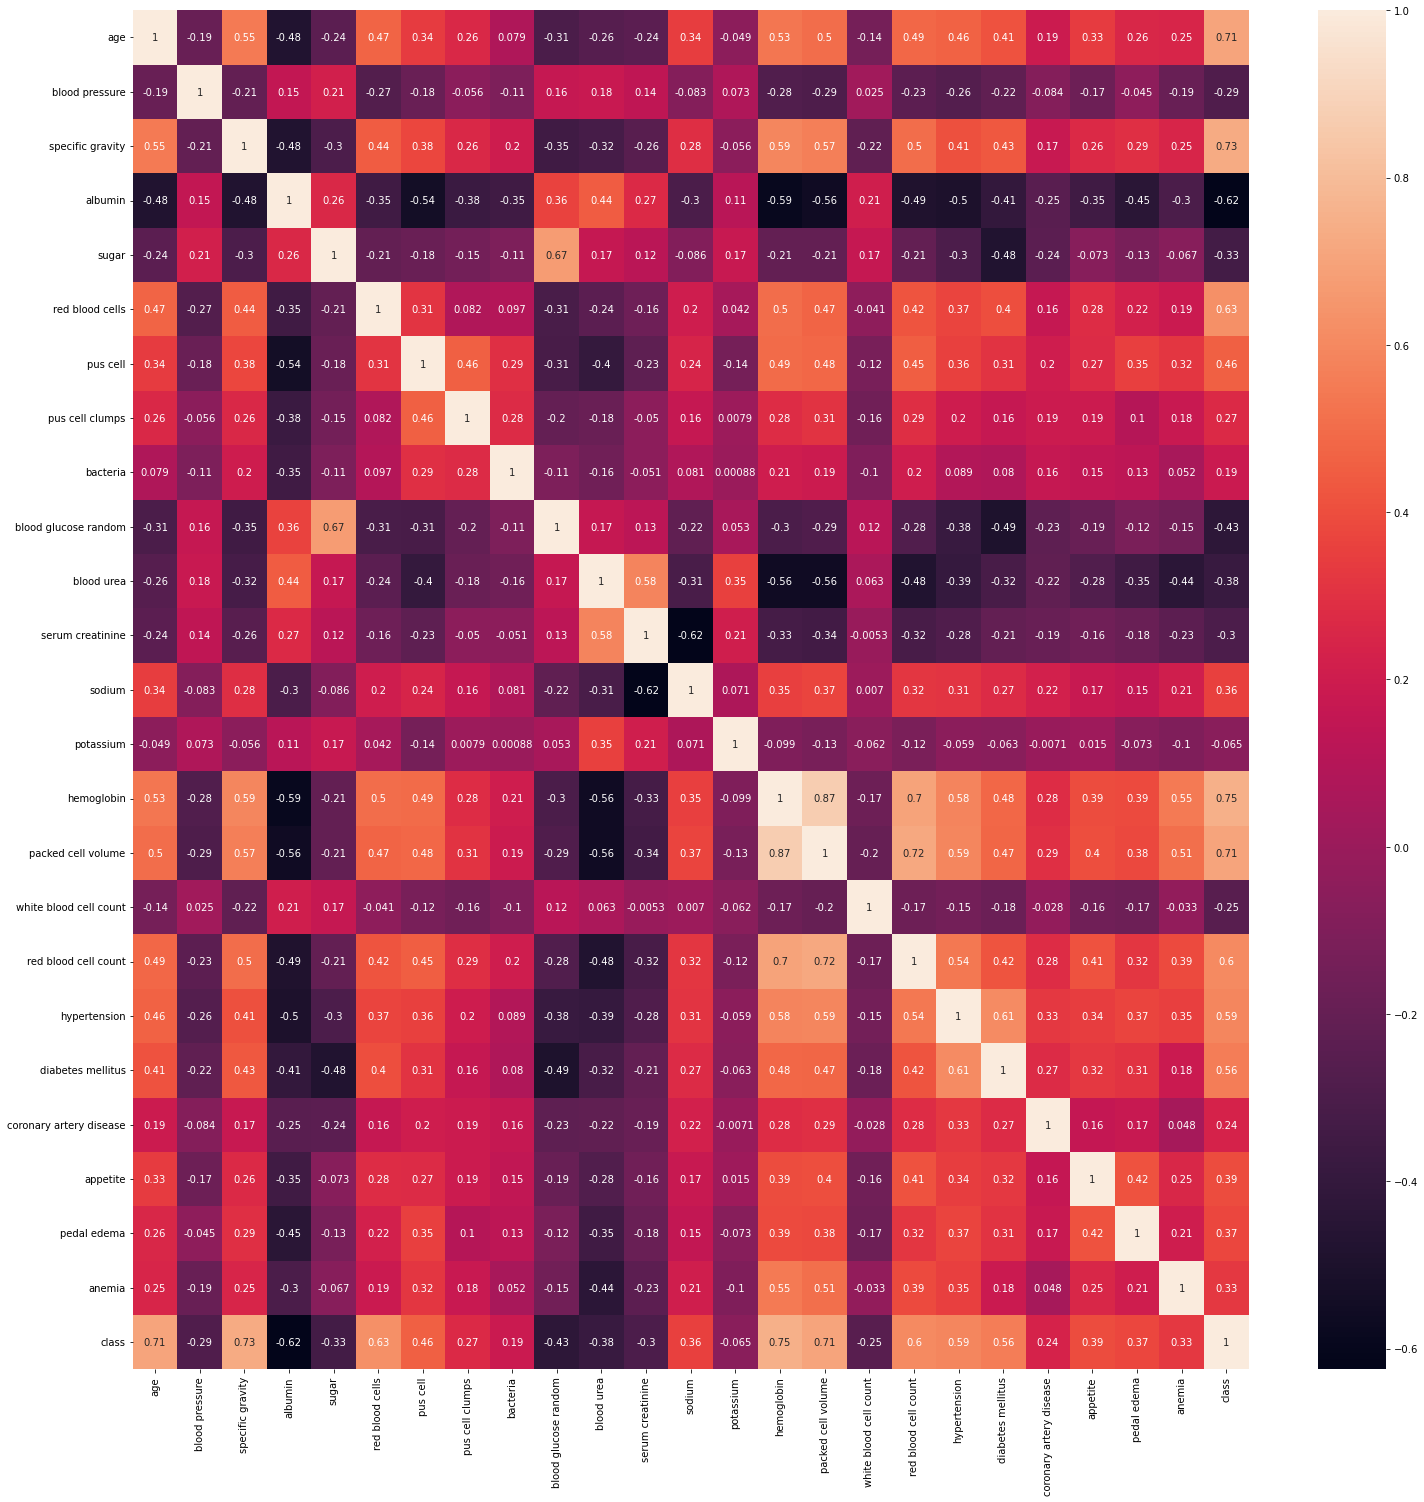

In [42]:
plt.figure(figsize=(25,25))
knnimputerCM = seaborn.heatmap(df2.corr(),annot= True)

In [43]:
arrmean = np.array(list(df2.corr().round(2).mean()))

arr1 = np.array([1])
arrmean

array([ 0.2104, -0.0484,  0.2044, -0.184 , -0.0304,  0.188 ,  0.1844,
        0.14  ,  0.0996, -0.0804, -0.116 , -0.0684,  0.1396,  0.0428,
        0.256 ,  0.25  , -0.0304,  0.23  ,  0.2072,  0.1724,  0.1244,
        0.1744,  0.1572,  0.1504,  0.2492])

In [44]:
data =np.subtract(arr1,arrmean)
column = np.asarray(df2.columns)
column

array(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'], dtype=object)

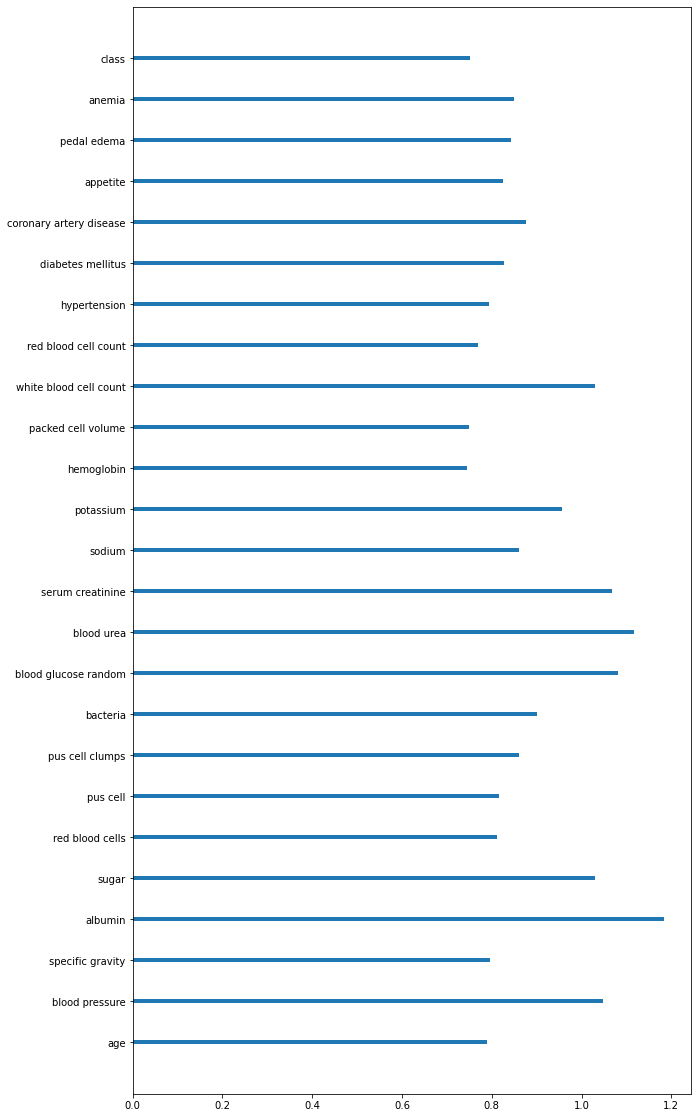

In [45]:

plt.figure(figsize=(10,20))
plt.barh(column,data, height = 0.1)
plt.show()


In [46]:
df2


age  blood pressure  specific gravity  albumin  sugar  \
0    0.000000        0.230769              0.75      0.2    0.0   
1    0.011364        0.000000              0.75      0.8    0.0   
2    0.022727        0.230769              0.25      0.4    0.6   
3    0.034091        0.153846              0.00      0.8    0.0   
4    0.034091        0.230769              0.25      0.4    0.0   
..        ...             ...               ...      ...    ...   
395  0.552273        0.230769              0.75      0.0    0.0   
396  0.484091        0.153846              1.00      0.0    0.0   
397  0.634091        0.230769              0.75      0.0    0.0   
398  0.486364        0.076923              1.00      0.0    0.0   
399  0.500000        0.230769              1.00      0.0    0.0   

     red blood cells  pus cell  pus cell clumps  bacteria  \
0                0.4       1.0              1.0       1.0   
1                0.4       1.0              1.0       1.0   
2                1.0       1.0              1.0       1.0   
3                1.0       0.0              0.0       1.0   
4                1.0       1.0              1.0       1.0   
..               ...       ...              ...       ...   
395              1.0       1.0              1.0       1.0   
396              1.0       1.0              1.0       1.0   
397              1.0       1.0              1.0       1.0   
398              1.0       1.0              1.0       1.0   
399              1.0       1.0              1.0       1.0   

     blood glucose random  ...  packed cell volume  white blood cell count  \
0                0.211538  ...            0.777778                0.231405   
1                0.350855  ...            0.644444                0.157025   
2                0.856838  ...            0.488889                0.219008   
3                0.202991  ...            0.511111                0.185950   
4                0.179487  ...            0.577778                0.210744   
..                    ...  ...                 ...                     ...   
395              0.252137  ...            0.844444                0.185950   
396              0.113248  ...            1.000000                0.231405   
397              0.166667  ...            0.888889                0.181818   
398              0.196581  ...            0.933333                0.206612   
399              0.232906  ...            0.977778                0.190083   

     red blood cell count  hypertension  diabetes mellitus  \
0                0.525424           0.0                0.0   
1                0.508475           1.0                1.0   
2                0.288136           1.0                0.0   
3                0.305085           0.0                1.0   
4                0.423729           1.0                1.0   
..                    ...           ...                ...   
395              0.474576           1.0                1.0   
396              0.694915           1.0                1.0   
397              0.559322           1.0                1.0   
398              0.644068           1.0                1.0   
399              0.677966           1.0                1.0   

     coronary artery disease  appetite  pedal edema  anemia  class  
0                        1.0       1.0          1.0     1.0    0.0  
1                        1.0       1.0          1.0     1.0    0.0  
2                        1.0       0.0          1.0     0.0    0.0  
3                        1.0       0.0          0.0     0.0    0.0  
4                        1.0       1.0          1.0     1.0    0.0  
..                       ...       ...          ...     ...    ...  
395                      1.0       1.0          1.0     1.0    1.0  
396                      1.0       1.0          1.0     1.0    1.0  
397                      1.0       1.0          1.0     1.0    1.0  
398                      1.0       1.0          1.0     1.0    1.0  
399                      1.0   

In [47]:
df2.to_csv('CKD_KNN.csv')

In [48]:
dffinal = df2[['anemia','appetite','serum creatinine', 'pedal edema', 'sodium',
               'red blood cells','sugar','pus cell clumps', 'coronary artery disease', 
               'blood pressure', 'bacteria','white blood cell count','potassium','class']]
dffinalsimple = dfsimple2[['age', 'blood pressure', 'sugar', 'red blood cells', 'pus cell clumps',
       'bacteria', 'blood glucose random', 'serum creatinine', 'sodium',
       'potassium', 'white blood cell count', 'coronary artery disease',
       'appetite', 'pedal edema', 'anemia', 'class']]

In [49]:
df1.to_csv('CKD_KNNFull.csv')

In [82]:
X = dffinal.iloc[:,:-1] # Using all column except for the last column as X
Y = dffinal.iloc[:,-1] # Selecting the last column as Y

X2 = dffinalsimple.iloc[:,:-1] # Using all column except for the last column as X
Y2 = dffinalsimple.iloc[:,-1] # Select

In [92]:
#x_70,x_30,y_70,y_30 = train_test_split(X,Y,test_size = 0.3)
#xsimp_70,xsimp_30,ysimp_70,ysimp_30 = train_test_split(X2,Y2,test_size = 0.3)

dfKNNTrain = pd.read_csv('CKD_KNN14train.csv')
dfKNNTest = pd.read_csv('CKD_KNN14test.csv')

Df_train = dfKNNTrain.iloc[:,:-1]
Df_test = dfKNNTest.iloc[:,-1]

X_70 = dfKNNTrain.iloc[:,:-1]# Using all column except for the last column as X
Y_70 = dfKNNTrain.iloc[:,-1]# Selecting the last column as Y
X_30 =dfKNNTest.iloc[:,:-1]
Y_30 = dfKNNTest.iloc[:,-1]

In [117]:
X_70

anemia  appetite  serum creatinine  pedal edema  sodium  red blood cells  \
0       0.0       0.0               0.0          0.0     0.7              1.0   
1       1.0       1.0               0.0          1.0     0.8              1.0   
2       1.0       1.0               0.0          0.0     0.9              0.4   
3       1.0       1.0               0.3          1.0     0.6              0.6   
4       1.0       1.0               0.0          0.0     0.8              1.0   
..      ...       ...               ...          ...     ...              ...   
275     1.0       1.0               0.0          1.0     0.9              1.0   
276     1.0       1.0               0.0          1.0     0.8              1.0   
277     1.0       1.0               0.0          1.0     0.9              1.0   
278     1.0       1.0               0.0          1.0     0.8              1.0   
279     1.0       1.0               0.0          1.0     0.8              1.0   

     sugar  pus cell clumps  coronary artery disease  blood pressure  \
0      0.0              0.0                      1.0             0.2   
1      0.0              1.0                      1.0             0.2   
2      0.0              1.0                      1.0             0.3   
3      0.0              1.0                      1.0             0.2   
4      0.8              1.0                      1.0             0.2   
..     ...              ...                      ...             ...   
275    0.0              1.0                      1.0             0.1   
276    0.0              1.0                      1.0             0.2   
277    0.0              1.0                      1.0             0.2   
278    0.0              1.0                      1.0             0.2   
279    0.0              1.0                      1.0             0.1   

     bacteria  white blood cell count  potassium  
0         1.0                     0.2        0.0  
1         1.0                     0.2        0.0  
2         1.0                     0.2        0.0  
3         1.0                     0.2        0.0  
4         1.0                     0.2        0.0  
..        ...                     ...        ...  
275       1.0                     0.2        0.0  
276       1.0                     0.3        0.1  
277       1.0                     0.2        0.1  
278       1.0                     0.2        0.0  
279       1.0                     0.2        0.1  

[280 rows x 13 columns]

In [155]:
Y_70

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
275    1.0
276    1.0
277    1.0
278    1.0
279    1.0
Name: class, Length: 280, dtype: float64

In [127]:
rf = RandomForestClassifier(max_depth=10)
dc = DecisionTreeClassifier( criterion='gini',
                               splitter='random',
                               max_depth=10,
                               min_samples_split=4,
                               min_samples_leaf=2,
                               min_weight_fraction_leaf=0.0, 
                               max_features=None,
                               random_state=None, 
                               max_leaf_nodes=None, 
                               min_impurity_decrease=0.0, 
                               class_weight=None, 
                               ccp_alpha=0.0)
KNN = KNeighborsClassifier(n_neighbors=9,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=2,
                           metric='minkowski',metric_params=None,n_jobs=None)
xgb_cl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
NB = GaussianNB()

dc.fit(X_70,Y_70)
rf.fit(X_70,Y_70)
KNN.fit(X_70,Y_70)
xgb_cl.fit(X_70,Y_70)
NB.fit(X_70,Y_70)
rfpredict = rf.predict(X_30)
dcpredict =dc.predict(X_30)
knnpredict = KNN.predict(X_30)
xgbprecit= xgb_cl.predict(X_30)
nbpredict = NB.predict(X_30)

[23:17:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Annaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [128]:
rfsimp = RandomForestClassifier(max_depth=10)
dcsimp = DecisionTreeClassifier( criterion='gini',
                               splitter='random',
                               max_depth=10,
                               min_samples_split=4,
                               min_samples_leaf=2,
                               min_weight_fraction_leaf=0.0, 
                               max_features=None,
                               random_state=None, 
                               max_leaf_nodes=None, 
                               min_impurity_decrease=0.0, 
                               class_weight=None, 
                               ccp_alpha=0.0)
KNNsimp = KNeighborsClassifier(n_neighbors=9,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=2,
                           metric='minkowski',metric_params=None,n_jobs=None)
xgb_clsimp = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
NBsimp = GaussianNB()

dcsimp.fit(xsimp_70,ysimp_70)
rfsimp.fit(xsimp_70,ysimp_70)
KNNsimp.fit(xsimp_70,ysimp_70)
xgb_clsimp.fit(xsimp_70,ysimp_70)
NBsimp.fit(xsimp_70,ysimp_70)
rfpredictsimp = rfsimp.predict(xsimp_30)
dcpredictsimp =dcsimp.predict(xsimp_30)
knnpredictsimp = KNNsimp.predict(xsimp_30)
xgbpredictsimp= xgb_clsimp.predict(xsimp_30)
nbpredictsimp = NBsimp.predict(xsimp_30)

[23:17:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Annaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [143]:
print(accuracy_score(Y_30,xgbprecit))

0.975


In [144]:
print(accuracy_score(Y_30,rfpredict))

0.975


In [145]:
print(classification_report(Y_30,knnpredict))#KNN

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        75
         1.0       0.98      0.96      0.97        45

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [146]:
print(accuracy_score(Y_30,knnpredict))

0.975


In [147]:
print(classification_report(Y_30,rfpredict))#Random Forest

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        75
         1.0       0.98      0.96      0.97        45

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [148]:
print(classification_report(Y_30,dcpredict))#Decision Tree

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        75
         1.0       0.93      0.96      0.95        45

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [149]:
print(classification_report(Y_30,nbpredict))#naive bayes

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        75
         1.0       0.85      1.00      0.92        45

    accuracy                           0.93       120
   macro avg       0.92      0.95      0.93       120
weighted avg       0.94      0.93      0.93       120



In [156]:
print(classification_report(Y_30,xgbprecit)) #XGBOOST

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        75
         1.0       0.98      0.96      0.97        45

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [151]:
print(classification_report(ysimp_30,knnpredictsimp))#KNN simp

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        86
         1.0       0.89      1.00      0.94        34

    accuracy                           0.97       120
   macro avg       0.95      0.98      0.96       120
weighted avg       0.97      0.97      0.97       120



In [152]:
print(classification_report(ysimp_30,rfpredictsimp))#Random Forest simp

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [153]:
print(classification_report(ysimp_30,dcpredictsimp))#Decision Tree simp

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        86
         1.0       0.97      0.94      0.96        34

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [62]:
print(classification_report(ysimp_30,nbpredictsimp))#naive bayes simp

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90        70
         1.0       0.79      1.00      0.88        50

    accuracy                           0.89       120
   macro avg       0.90      0.91      0.89       120
weighted avg       0.91      0.89      0.89       120



In [63]:
print(classification_report(ysimp_30,xgbpredictsimp)) #XGBOOST simp

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        70
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

